## Reflections on Automata

I'll begin by reflecting on the classic Cellular Automata: **Conway's Game of Life**. Life involves cells with two states, and cells can switch from alive to dead, from dead to alive, or maintain a state of either life or death. The fate of a cell is determined by the number of its neighbors that are alive. Since Life cells can switch states based on only a small change in their environment, even the smallest of changes can cascade and create a major disruption.

```python
if the cell is dead:
    if the number of live neighbors is 2 or 3:
        the cell comes to life
    else:
        the cell remains dead
if the cell is alive:
    if the cell has three live neighbors:
        the cell remains alive
    else:
        the cell dies
```

I thought the **Colliding Cyclones** ruleset contrasts with Life in an interesting way. In Colliding Cyclones, each cell must cycle through the 3 different states; it cannot skip an intermediate state. It changes to the next state if several of its neighbors are of the state to which it would naturally progress. The lack of the "death" behavior seen in Conway's Game of Life lends stability to this CA. Cells can only progress in a constant order; they cannot move backwards in the pattern. Thus, this ruleset is hard to interrupt. In Life, a disruption can propagate and cause a big change, however in Colliding Cyclones a change will instantly disappear when cells of the next color appear around it.

```python
if the cell has more than three neighbors of the next state:
    the cell state progresses
```

**Rock paper scissors** introduces randomness. In Rock Paper Scissors, there is an element of randomness and thus it is difficult to disrupt. No small change causes disruption since there is no predictable pattern.

```python
if random.random() > 1/3:
    the cell adopts the state of its neighbor
```

## Automata simulated in Emoji

1. [Game of Life](http://ncase.me/emoji-prototype/?remote=-KnkNPGfdaEFyH8BfUNT)
2. [Colliding Cyclones](http://ncase.me/emoji-prototype/?remote=-KnkLd8soX61i4Ta6rf9)
3. *The Rock Paper Scissors automata cannot be modelled*

# Implementation of Game of Life

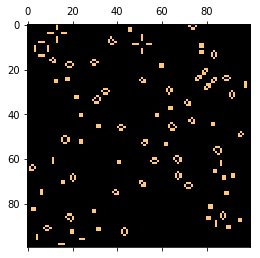

In [13]:
import matplotlib.pyplot as plt
from random import randint
from IPython.display import clear_output as clear
import time

size = 100
plt.set_cmap('copper')

# Create board of 30% booleans
board = [[0] * size for _ in range(size)]
for row in range(size):
    for col in range(size):
        board[row][col] = randint(1, 10) < 3

def count_live_neighbors(row, col):
    global board
    rowroomneg = row > 0;
    colroomneg = col > 0;
    rowroompos = row < size - 1;
    colroompos = col < size - 1;
    return sum([
        colroomneg and board[row][col - 1],                     # above
        rowroompos and colroomneg and board[row + 1][col - 1],  # above right
        rowroompos and board[row + 1][col],                     # right
        rowroompos and colroompos and board[row + 1][col + 1],  # below right
        colroompos and board[row][col + 1],                     # below
        rowroomneg and colroompos and board[row - 1][col + 1],  # below left
        rowroomneg and board[row - 1][col],                     # left
        rowroomneg and colroompos and board[row - 1][col - 1],  # above and left
    ])

def step():
    global board
    new_board = [[0] * size for _ in range(size)]
    for row in range(size):
        for col, value in enumerate(board[row]):
            live_neighbors = count_live_neighbors(row, col)
            if value:  # Cell is alive
                new_board[row][col] = live_neighbors in [2, 3]  # Any dead cell 
            else:  # Cell is dead
                new_board[row][col] = live_neighbors == 3  # Any dead cell with exactly 3 live neighbors is born
    board = new_board
    plt.matshow(board)
    clear(wait=True)
    plt.show()

while True:
    try:
        step()
    except KeyboardInterrupt:
        break